# Deep Learning for Life Sciences - Team Assignment

Recent progress in spatial tissue imaging has resulted in the emergence of many new technologies that enable measurements of multiple biological markers at the subcellular level. One such technology is IMC (Imaging Mass Cytometry), developed at [BodemillerLab](https://www.bodenmillerlab.com/#/) in Zurich. [Here](https://www.nature.com/articles/s41586-019-1876-x), you can read how this technology has enabled massive progress in understanding the mechanisms behind breast cancer.

One application of this technology is analyzing the data from the [Immucan](https://immucan.eu/) consortium, where data from patients with different cancer types is analyzed using various techniques, including IMC.

# Task
[Cell typing](https://en.wikipedia.org/wiki/Cell_type), a fundamental step in cellular data analysis, involves assigning each cell to a specific type. In this assignment, you will perform cell typing based on the manually expert-annotated data. At the high level, your task will be to:

1. **Perform EDA (exploratory data analysis) (3pts)** - in the form of an approx. 5-minute presentation - you will present your insight about the data you were provided with.
2. **Apply a baseline technique for the classification (3pts).** Each team should try at least three popular techniques on the provided data. Among these three popular techniques, there should be:
    - one linear baseline (e.g., multiclass logistic regression, SVM, etc.),
    - one gradient boosting technique (e.g., XGBoost, CatBoost, etc.),
    - one additional technique of your choice.
3. **Apply one of the state-of-the-art methods pre-selected by Immucan researchers (5pts)** (see description below).

## State-of-the-art methods
We will assign each team with one of the pre-selected state-of-the-art methods:
- [cellSighter](https://www.nature.com/articles/s41467-023-40066-7),
- [Stellar](https://www.nature.com/articles/s41592-022-01651-8), (additional [biorxiv](https://www.biorxiv.org/content/10.1101/2021.11.24.469947v3) URL),
- [Pixie](https://www.nature.com/articles/s41467-023-40068-5),
- [Astir](https://astir.readthedocs.io/en/latest/index.html),
- [Celesta](https://www.nature.com/articles/s41592-022-01498-z) (additional [biorxiv](https://www.biorxiv.org/content/10.1101/2022.02.02.478888v1) URL),
- [CSPOT](https://www.biorxiv.org/content/10.1101/2023.11.15.567196v1),
- [STARLING](https://www.biorxiv.org/content/10.1101/2024.02.29.582827v2).

We will assign a method to a team based on the random choice driven by your preferences. The voting procedure will be as follows: each team must set their preferences in this [sheet](https://docs.google.com/spreadsheets/d/1wtdwD7O49GHmPmPPFYF9WcjlDG0VRwf6MOWh3aV0iaw/edit?usp=sharing) (where you should also write your team name and members). To each method, your team can assign from 0 to 5 points (the more points, the higher the chance of getting a method). Each team has 10 points in total. In case when there are more teams than selected methods, the most popular method will be assigned to more than one team. Please e-mail marcin.mozejko@student.uw.edu.pl once you filled the spreadsheet for your team.

# Data
We will provide you with [training data](https://drive.google.com/file/d/1-0YOHE1VoTRWqfBJLHQorGcHmkhCYvqW/view?usp=sharing) and a hold-out test set. The training data will be provided from the start of the assignment, and the test data will be provided on May 9th during the grading of your task. Both datasets are in the same format. In the code below the task description you will be provided with a brief data overview.

# Grading
1. **EDA** - A maximal number of points (3) will be assigned when a team will present:
    - A general data overview,
    - Correlation patterns between markers and cell types (at least 3) - with a biological explanation,
    - Three biologically driven patterns of intertype marker differentiation (e.g., Tumor PDL1+ vs Tumor PDL1-, Mac CD206+ vs Mac CD206-, etc.),
2. **Baseline techniques**: For proper implementation of each of the three methods, we will award 1 point,
If possible, a method should enable random seed/state-based reproducibility,
3. **State-of-the-art methods**: A proper application of the existing method will be awarded with 5 pts.

## Metrics

Please report:
- overall Accuracy, and `macro-f1`,
- per cell type `average_precision` and `AUC`.

## Additional Compute

In case you need an additional compute - please contant the author of the task: marcin.mozejko@student.uw.edu.pl

## Deliverables
Each team should provide a git repository with a code and analysis. In each of the repositories, there should be:
1. Instructions on how to set up the environment (e.g., virtual env, docker, etc.) to run your method (1pt),
2. Instructions on how to pre-train baselines and state-of-the-art methods on new data (in the same format as the one provided with the task). For each method, the output should be a table where each cell will be assigned cell-type probabilities (if available) and a final cell-type prediction (2 pts).
3. Instructions on how to apply your pre-trained baseline methods and assigned state-of-the-art methods to new data (in the same format as the one provided with the task). For each method, the output should be a table where each cell will be assigned cell-type probabilities (if available) and a final cell-type prediction (1pts).

## Additional points:
- A team with the highest scoring baseline method on the test data will be awarded three activity points,
- Any creative modification of the state-of-the-art method will be awarded with up to 3 activity points,
- Any interesting biological insight gained from EDA or baseline/method training will be awarded with up to 3 activity points,
- Any uncertainty-based analysis of any model result will be awarded with one activity point.

## Project Timeline
- **April 11th** - release of the task, and the state-of-the-art method voting spreadsheet,
- **April 15th, 23:59** - end of the state-of-the-art method voting,
- **April 18th** - assignment of the state-of-the-art methods to the teams,
- **May 9th** - final presentation, release of the test data.

# Contact

In case of any questions - contact **Marcin Możejko** (marcin.mozejko@student.uw.edu.pl) - the author of the task.

# Data Overview

Let us start with appropriate imports:

In [2]:
!pip install anndata
!pip install delayedarray
!pip install pyometiff

In [3]:
import os

from google.colab import drive

import anndata


drive.mount('/content/drive') # use if you plan to use colab.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Now - download the training data from [here](https://drive.google.com/file/d/1-0YOHE1VoTRWqfBJLHQorGcHmkhCYvqW/view?usp=sharing).

Unzip the archive and set `PATH_TO_FOLDER` to a path where you unzipped the data:

In [4]:
PATH_TO_FOLDER = "/content/drive/MyDrive/DLS/train"
TRAIN_DATA_PATH = '/content/drive/MyDrive/DLS/train'
ORIGINAL_IMAGE_DATA_SUBDIR = 'images_masks'
ORIGINAL_MASKS_SUBDIR = 'masks'
ORIGINAL_IMAGES_SUBDIR = 'img'

if PATH_TO_FOLDER is None:
    raise ValueError('Please set PATH_TO_FOLDER to a path with unzipped training data.')

ANNDATA_PATH = 'cell_data.h5ad'
TRAIN_ANNDATA_PATH = os.path.join(TRAIN_DATA_PATH, ANNDATA_PATH)
TRAIN_IMAGE_DATA_DIR = os.path.join(TRAIN_DATA_PATH, ORIGINAL_IMAGE_DATA_SUBDIR)
TRAIN_IMAGE_DATA_IMAGES = os.path.join(TRAIN_IMAGE_DATA_DIR, ORIGINAL_IMAGES_SUBDIR)
TRAIN_IMAGE_DATA_MASKS = os.path.join(TRAIN_IMAGE_DATA_DIR, ORIGINAL_MASKS_SUBDIR)

In [5]:
adata = anndata.read_h5ad(TRAIN_ANNDATA_PATH)

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [7]:
import pandas as pd
import seaborn as sns
adata.layers['exprs'] = np.arcsinh(adata.layers['exprs'] / 5.)

# EDA

## Correlation patterns between markers and cell types

In [8]:
marker_names = list(adata.var['marker'])
cell_labels_exprs = adata.obs['cell_labels']
df = pd.DataFrame(adata.layers['exprs'], columns = marker_names)
df.insert(len(df.columns), "cell_labels", list(adata.obs['cell_labels']))

In [9]:
df

,MPO,HistoneH3,SMA,CD16,CD38,HLADR,CD27,CD15,CD45RA,CD163,...,CD40,CD4,CD14,Ecad,CD303,CD206,cleavedPARP,DNA1,DNA2,cell_labels
0,0.000000,0.356404,0.100361,0.250455,0.102820,0.624800,0.080672,0.090959,0.105551,0.559954,...,0.113206,0.324592,0.491246,0.154856,0.000000,0.665901,0.084753,0.847186,0.923356,MacCD163
1,0.027181,0.462005,0.225477,0.100934,0.120873,0.141697,0.083864,0.020021,0.148059,0.065923,...,0.120402,0.268438,0.333803,0.368555,0.013774,0.148382,0.023722,0.885503,0.954479,Mural
2,0.033175,0.435122,0.275759,0.342161,0.091580,0.733683,0.000721,0.112340,0.244849,0.342814,...,0.161851,0.380643,0.646955,0.341996,0.080635,0.435028,0.003028,0.796686,0.855100,DC
3,0.033175,0.227001,0.112406,0.231138,0.102567,0.396472,0.129685,0.050009,0.238727,0.196804,...,0.243252,0.442884,0.479728,0.439499,0.039230,0.188186,0.046602,0.690920,0.789117,Tumor
4,0.027496,0.428921,0.177540,0.099366,0.082474,0.295517,0.019625,0.041701,0.183543,0.248609,...,0.071957,0.285137,0.451058,0.460960,0.012313,0.321038,0.074387,0.824742,0.902713,Tumor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236786,0.044771,0.972477,0.522792,0.452190,0.169862,0.326357,0.326295,0.238182,0.261421,0.157233,...,0.030349,0.163447,0.313110,0.273018,0.161974,0.106068,0.006945,0.783990,0.858377,Mural
236787,0.029884,0.718375,0.525726,0.140125,0.107772,0.086967,0.111346,0.029300,0.080419,0.063402,...,0.013842,0.051260,0.246816,0.237808,0.046073,0.040698,0.000000,0.828517,0.906893,Mural
236788,0.022175,0.655988,0.062127,0.497294,0.451769,0.677491,0.284738,0.049750,0.091045,0.203722,...,0.086766,0.365527,0.557114,0.281801,0.197656,0.044868,0.020502,0.779303,0.856565,CD8
236789,0.030184,0.765888,0.508173,0.160870,0.080647,0.242943,0.080070,0.053107,0.102526,0.033648,...,0.019227,0.048917,0.294732,0.157751,0.009497,0.018119,0.016794,0.856041,0.931607,Mural


## TODO Check variances

## 1 sample t test

For each cell type, test, if any marker has signifficantly different mean expression to the mean expression of this marker in a whole cell population.

In [10]:
def cell_type_test_1samp(df, cell_types, marker_names):
    p_values_out = []
    for cell_type in cell_types:
        p_values = [cell_type]
        for marker in marker_names:
            avg_exprs = df[marker].mean()
            p_values.append(stats.ttest_1samp(df[marker][df['cell_labels'] == cell_type], avg_exprs).pvalue)
        p_values_out.append(p_values)
    return pd.DataFrame(p_values_out, columns=["cell_type"]+marker_names)


In [11]:
df_1_samp = cell_type_test_1samp(df, list(adata.obs['cell_labels'].unique()), marker_names)

In [12]:
df_1_samp

,cell_type,MPO,HistoneH3,SMA,CD16,CD38,HLADR,CD27,CD15,CD45RA,...,VISTA,CD40,CD4,CD14,Ecad,CD303,CD206,cleavedPARP,DNA1,DNA2
0,MacCD163,3.549138e-03,4.471473e-245,1.507147e-71,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.278726e-151,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.138407e-28,0.000000e+00,3.293335e-18,2.321775e-301,5.037462e-296
1,Mural,0.000000e+00,3.691594e-165,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.764624e-24,1.398214e-24
2,DC,2.148769e-02,3.631776e-01,1.617444e-67,0.000000e+00,5.655622e-01,0.000000e+00,9.468010e-01,3.921175e-09,1.072181e-05,...,8.890999e-194,0.000000e+00,0.000000e+00,0.000000e+00,3.188281e-260,1.193797e-04,5.092560e-49,1.813182e-03,2.238992e-37,1.331121e-37
3,Tumor,0.000000e+00,1.069546e-48,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.391201e-172,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.486463e-188,0.000000e+00,0.000000e+00,6.116153e-107,2.694240e-107
4,CD4,6.486722e-259,2.674261e-13,3.997477e-104,4.483783e-225,1.037066e-33,0.000000e+00,0.000000e+00,0.000000e+00,4.015103e-10,...,0.000000e+00,5.040100e-232,0.000000e+00,0.000000e+00,0.000000e+00,3.713235e-11,2.179913e-241,6.395650e-52,7.192282e-118,5.122636e-116
5,HLADR,6.691060e-12,1.528018e-48,1.111902e-70,1.763912e-39,1.579866e-170,0.000000e+00,1.526792e-301,4.425328e-109,0.000000e+00,...,9.784307e-23,3.676036e-18,2.080556e-109,4.098237e-05,0.000000e+00,1.058864e-159,5.129137e-05,3.391566e-88,6.502753e-74,7.219554e-75
6,NK,5.260155e-17,9.858018e-04,5.613311e-03,3.285545e-87,5.247676e-13,8.266328e-26,5.763504e-02,8.416113e-19,7.315136e-129,...,3.384041e-37,2.296983e-16,3.105406e-01,1.237635e-43,2.127698e-293,5.207984e-01,2.598888e-26,2.855488e-12,2.825636e-02,3.139645e-02
7,CD8,1.320469e-271,5.582632e-06,7.674498e-20,0.000000e+00,6.488342e-255,0.000000e+00,0.000000e+00,1.342037e-131,2.211191e-20,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.014014e-29,0.000000e+00,6.538787e-181,8.161431e-258,3.956257e-255
8,Treg,7.666846e-46,8.854123e-103,5.535949e-95,0.000000e+00,5.329020e-103,0.000000e+00,0.000000e+00,4.986839e-99,1.039784e-04,...,2.066451e-259,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.151128e-87,1.482109e-225,1.036937e-07,1.700672e-246,4.000944e-244
9,Neutrophil,0.000000e+00,0.000000e+00,9.394028e-71,3.127455e-24,4.574113e-66,4.347336e-37,2.799033e-01,0.000000e+00,1.329707e-48,...,0.000000e+00,1.553469e-48,8.696157e-207,1.162716e-72,4.983317e-218,0.000000e+00,1.039123e-84,1.530551e-06,2.156831e-119,1.567834e-119


<Axes: ylabel='Count'>

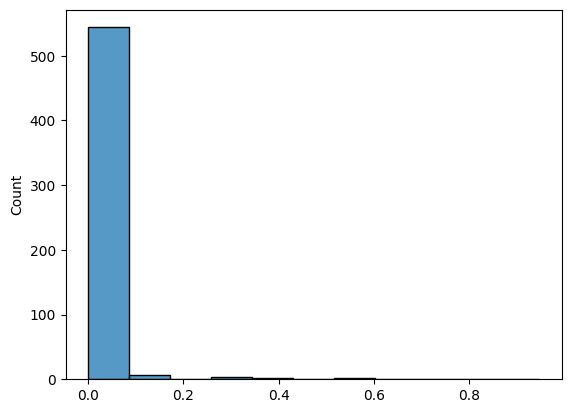

In [13]:
sns.histplot(np.array(df_1_samp[marker_names]).flatten()+0.0001)

In [15]:
df_1_samp.iloc[0][marker_names]

MPO                  0.003549
HistoneH3                 0.0
SMA                       0.0
CD16                      0.0
CD38                      0.0
HLADR                     0.0
CD27                      0.0
CD15                      0.0
CD45RA                    0.0
CD163                     0.0
B2M                       0.0
CD20                      0.0
CD68                      0.0
Ido1                      0.0
CD3                       0.0
LAG3                      0.0
CD11c                     0.0
PD1                       0.0
PDGFRb                    0.0
CD7                       0.0
GrzB                      0.0
PDL1                      0.0
TCF7                      0.0
CD45RO                    0.0
FOXP3                     0.0
ICOS                      0.0
CD8a                      0.0
CarbonicAnhydrase         0.0
CD33                      0.0
Ki67                      0.0
VISTA                     0.0
CD40                      0.0
CD4                       0.0
CD14      

In [21]:
cell_labels = list(adata.obs['cell_labels'].unique())

for i, cell in enumerate(cell_labels):
    print(f"No. of markers with p-values <0.01 for cell type: {cell}")
    print(df_1_samp.iloc[i][marker_names][df_1_samp.iloc[i][marker_names]<0.01].count())

No. of markers with p-values <0.01 for cell type: MacCD163
40
No. of markers with p-values <0.01 for cell type: Mural
40
No. of markers with p-values <0.01 for cell type: DC
35
No. of markers with p-values <0.01 for cell type: Tumor
38
No. of markers with p-values <0.01 for cell type: CD4
39
No. of markers with p-values <0.01 for cell type: HLADR
40
No. of markers with p-values <0.01 for cell type: NK
33
No. of markers with p-values <0.01 for cell type: CD8
38
No. of markers with p-values <0.01 for cell type: Treg
39
No. of markers with p-values <0.01 for cell type: Neutrophil
39
No. of markers with p-values <0.01 for cell type: plasma
38
No. of markers with p-values <0.01 for cell type: B
38
No. of markers with p-values <0.01 for cell type: pDC
39
No. of markers with p-values <0.01 for cell type: BnT
39


For all cell types, almost all markers are indicated to have different mean expression than in the whole population - the result is not informative.

Almost all p-values lower than 0.01, difficult to notice anything significant.
Trying different statistical test.

In [17]:
def cell_type_test_ind(df, cell_types, marker_names):
    p_values_out = []
    for cell_type in cell_types:
        p_values = [cell_type]
        for marker in marker_names:
            p_values.append(stats.ttest_ind(df[marker][df['cell_labels'] == cell_type], df[marker], equal_var=False).pvalue)
        p_values_out.append(p_values)
    return pd.DataFrame(p_values_out, columns=["cell_type"]+marker_names)
df_test_ind = cell_type_test_ind(df, list(adata.obs['cell_labels'].unique()), marker_names)

<Axes: ylabel='Count'>

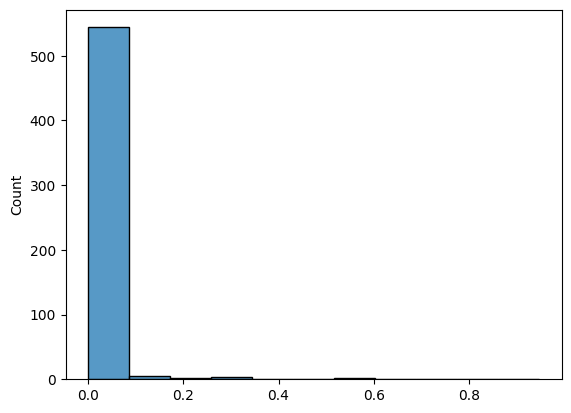

In [18]:
# counts, bins = np.histogram(np.array(df_ttest[marker_names]).flatten())
# plt.stairs(counts, bins)
sns.histplot(np.array(df_test_ind[marker_names]).flatten()+0.0001)

## Clustering

In [24]:
from sklearn.cluster import KMeans

In [25]:
n_types = len(df['cell_labels'].unique())
print(n_types)

14


In [26]:
kmeans = KMeans(n_clusters=n_types, random_state=0, n_init="auto").fit(df[marker_names])

In [27]:
df['cluster_id'] = kmeans.labels_
df.head()

,MPO,HistoneH3,SMA,CD16,CD38,HLADR,CD27,CD15,CD45RA,CD163,...,CD4,CD14,Ecad,CD303,CD206,cleavedPARP,DNA1,DNA2,cell_labels,cluster_id
0,0.000000,0.356404,0.100361,0.250455,0.102820,0.624800,0.080672,0.090959,0.105551,0.559954,...,0.324592,0.491246,0.154856,0.000000,0.665901,0.084753,0.847186,0.923356,MacCD163,12
1,0.027181,0.462005,0.225477,0.100934,0.120873,0.141697,0.083864,0.020021,0.148059,0.065923,...,0.268438,0.333803,0.368555,0.013774,0.148382,0.023722,0.885503,0.954479,Mural,13
2,0.033175,0.435122,0.275759,0.342161,0.091580,0.733683,0.000721,0.112340,0.244849,0.342814,...,0.380643,0.646955,0.341996,0.080635,0.435028,0.003028,0.796686,0.855100,DC,12
3,0.033175,0.227001,0.112406,0.231138,0.102567,0.396472,0.129685,0.050009,0.238727,0.196804,...,0.442884,0.479728,0.439499,0.039230,0.188186,0.046602,0.690920,0.789117,Tumor,9
4,0.027496,0.428921,0.177540,0.099366,0.082474,0.295517,0.019625,0.041701,0.183543,0.248609,...,0.285137,0.451058,0.460960,0.012313,0.321038,0.074387,0.824742,0.902713,Tumor,3


In [28]:
def cluster_map(df):
    # df = pd.DataFrame([cell_labels, clust_labels],columns=["cell_labels","clust_labels"])
    idx = sorted(list(set(df['cluster_id'])))
    cell_labels = df['cell_labels'].unique()
    cols = [cell_labels]
    rows = []
    for clust_id in idx:
        clust_row = []
        for cell in cell_labels:
            # print(df[(df['cluster_id']==clust_id) & (df['cell_labels']==cell)]['cell_labels'].count())
            clust_row.append(round(df[(df['cluster_id']==clust_id) & (df['cell_labels']==cell)]['cell_labels'].count()/df[df['cluster_id']==clust_id]['cell_labels'].count(),2))
        rows.append(clust_row)
    return(pd.DataFrame(rows,columns=cell_labels,index=idx))
cluster_map(df)

,MacCD163,Mural,DC,Tumor,CD4,HLADR,NK,CD8,Treg,Neutrophil,plasma,B,pDC,BnT
0,0.00,0.07,0.00,0.89,0.01,0.01,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.00
1,0.01,0.00,0.02,0.84,0.03,0.01,0.00,0.05,0.02,0.01,0.01,0.00,0.00,0.00
2,0.00,0.00,0.04,0.00,0.04,0.00,0.00,0.01,0.01,0.00,0.00,0.41,0.02,0.46
3,0.00,0.01,0.00,0.98,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.01,0.01,0.16,0.00,0.01,0.65,0.11,0.00,0.00,0.00,0.01,0.03
5,0.04,0.00,0.04,0.06,0.11,0.01,0.01,0.32,0.12,0.01,0.07,0.01,0.04,0.16
6,0.00,0.02,0.00,0.91,0.00,0.00,0.00,0.00,0.00,0.05,0.00,0.00,0.00,0.00
7,0.00,0.01,0.00,0.97,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,0.00,0.39,0.01,0.01,0.10,0.03,0.01,0.01,0.02,0.00,0.39,0.01,0.02,0.00
9,0.13,0.02,0.09,0.48,0.07,0.06,0.01,0.11,0.01,0.00,0.00,0.00,0.00,0.00


## Cluster map
Each row is a cluster. Each cell in a row, is a content of given cell type in this cluster.

<Axes: >

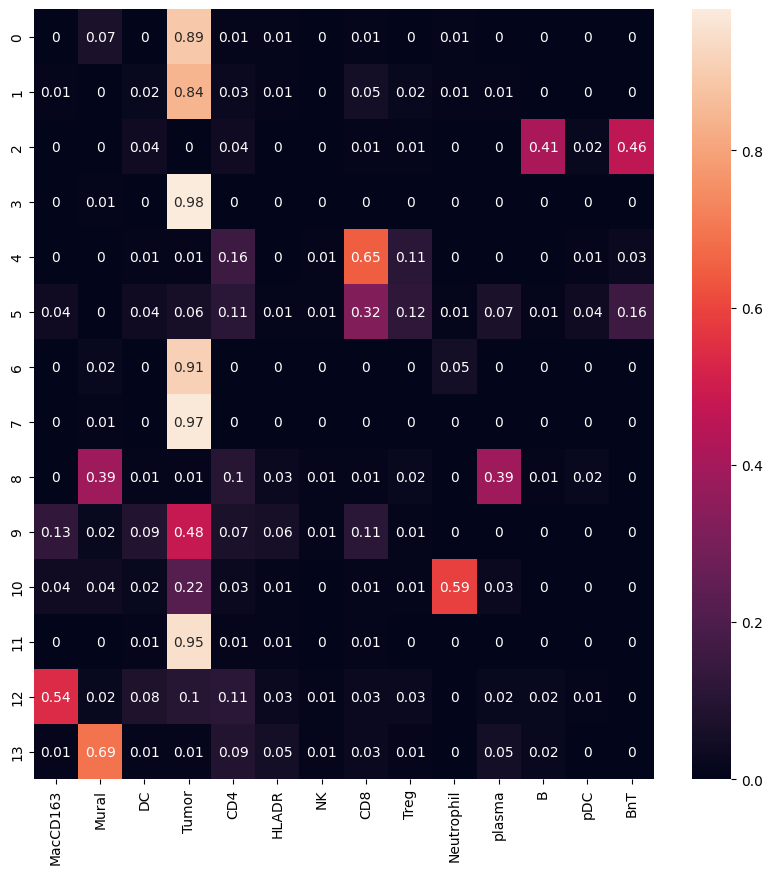

In [39]:
df_clust = cluster_map(df)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_clust, annot=True, ax=ax)

## Batch effect

https://www.sc-best-practices.org/cellular_structure/integration.html

In [ ]:
!pip install scanpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 9.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 11.8 MB/s eta 0:00:00
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8026 sha256=019d797687d9873014a89694df28d21598c451b945a941314a754482839e9fa4
  Stored in directory: /root/.cache/pip/wheels/6a/aa/b9/eb5d4031476ec10802795b97ccf937b9bd998d68a9b268765a
Successfully built session-info


In [ ]:
import scanpy as sc
import matplotlib.pyplot as plt
import numpy

In [ ]:
adata = sc.read_h5ad("/content/drive/MyDrive/DLS/train/cell_data.h5ad")

In [ ]:
batch_key = "BatchId"
label_key = "cell_labels"

/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_pca.py:374: FutureWarning: Argument `use_highly_variable` is deprecated, consider using the mask argument. Use_highly_variable=True can be called through mask_var="highly_variable". Use_highly_variable=False can be called through mask_var=None
  warn(msg, FutureWarning)


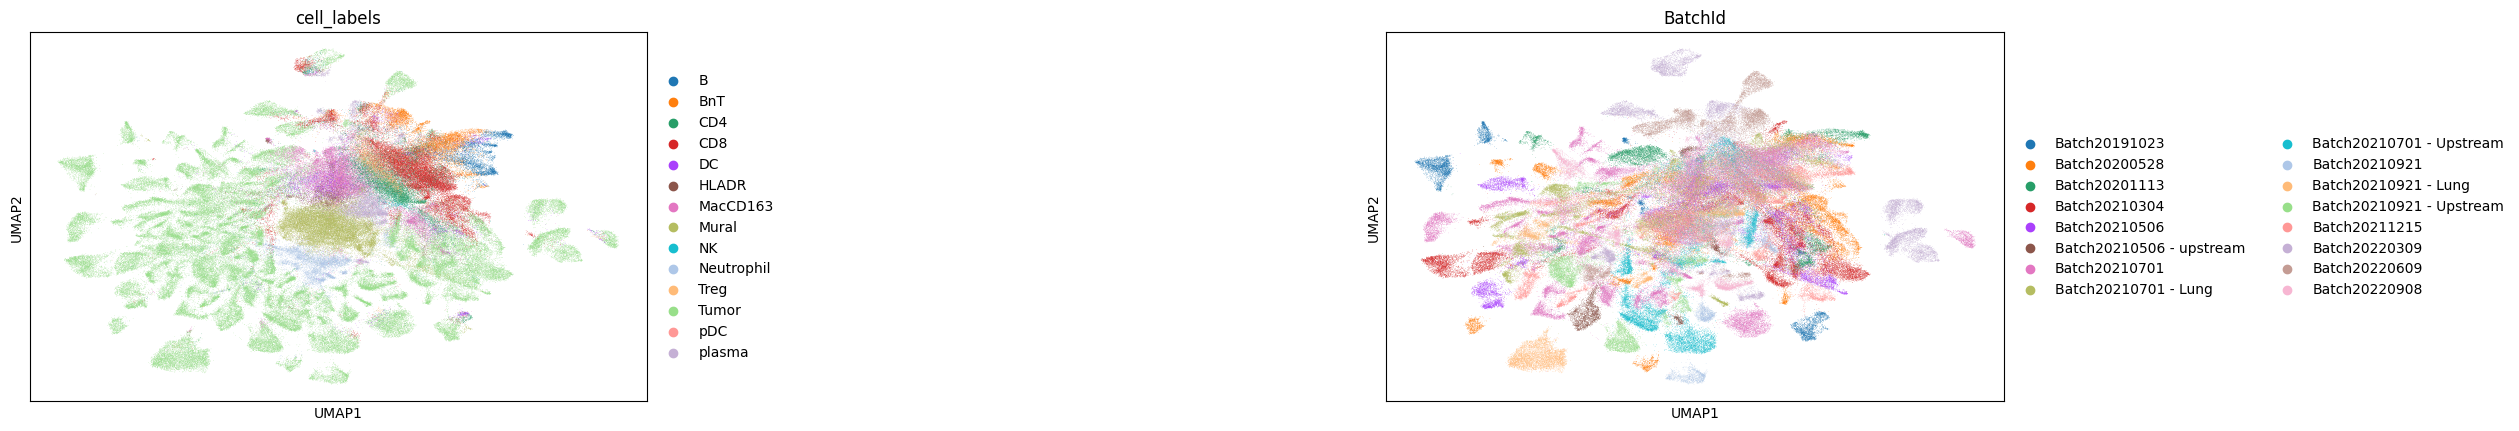

In [ ]:
sc.tl.pca(adata, layer="exprs",use_highly_variable=False)
#needed for p.neighbours to work
adata.X = adata.layers["exprs"]
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.pl.umap(adata, color=[label_key, batch_key], wspace=1)

https://nbisweden.github.io/workshop-archive/workshop-scRNAseq/2020-01-27/labs/compiled/scanpy/scanpy_03_integration.html

https://pypi.org/project/inmoose/

https://www.sc-best-practices.org/cellular_structure/integration.html


## A general data overview



### TODO

1. https://scanpy-tutorials.readthedocs.io/en/latest/pbmc3k.html

In [ ]:
marker_names = list(adata.var['marker'])
cell_labels_exprs = adata.obs['cell_labels']

In [ ]:
import pandas as pd
import seaborn as sns
adata.layers['exprs'] = numpy.arcsinh(adata.layers['exprs'] / 5.)
df_exprs = pd.DataFrame(adata.layers['exprs'],index=cell_labels_exprs, columns = marker_names)
markers_corr = df_exprs.corr()

In [ ]:
!pip install igraph
!pip install leidenalg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 6.6 MB/s eta 0:00:00


In [ ]:
adata.X = adata.layers["exprs"]
sc.pp.neighbors(adata)
sc.tl.leiden(adata, key_added="leiden_2")
sc.tl.rank_genes_groups(
    adata, groupby="leiden_2", method="wilcoxon", key_added="dea_leiden_2"
)

### Markers' expression correlation matrix

<Axes: >

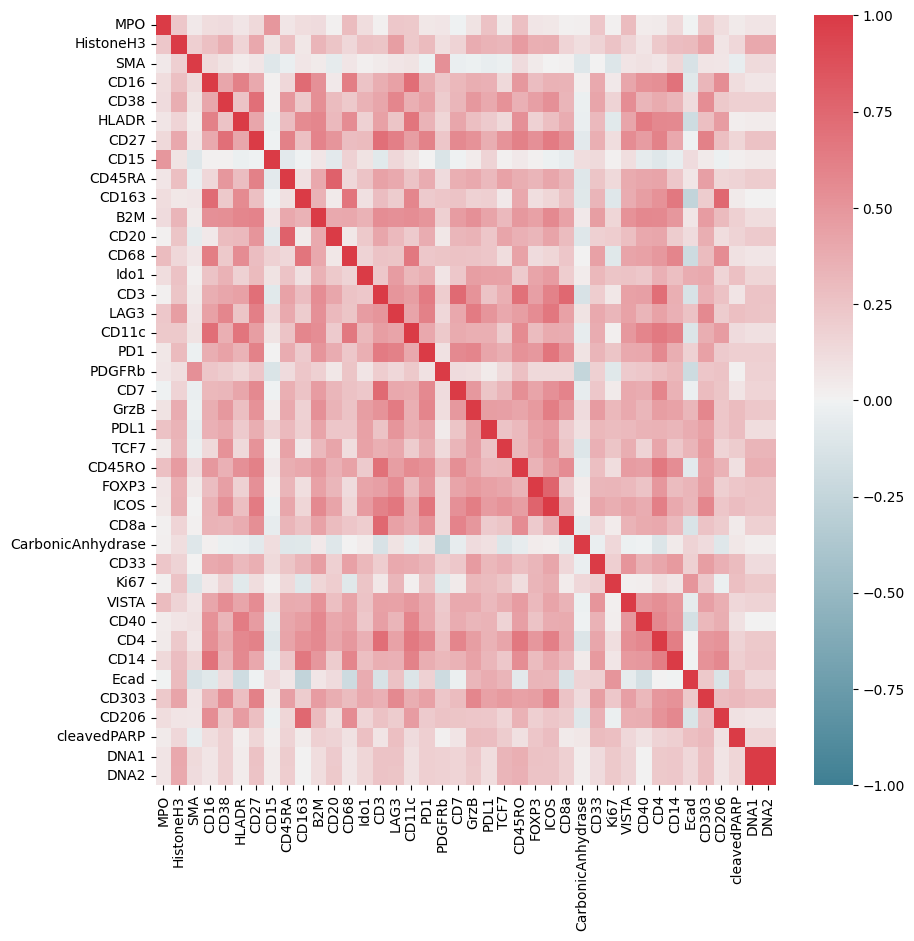

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(markers_corr,
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            vmin=-1.0, vmax=1.0,
            xticklabels=markers_corr.columns.values,
            yticklabels=markers_corr.columns.values,
            ax=ax)

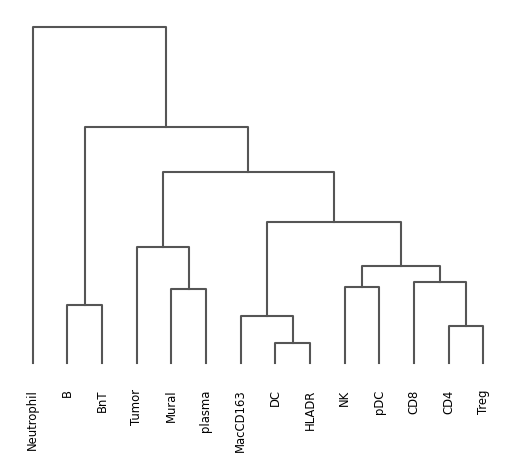

<Axes: >

In [ ]:
sc.tl.dendrogram(adata, use_rep='X', groupby='cell_labels')
sc.pl.dendrogram(adata, groupby='cell_labels')

In [ ]:
# https://scanpy.readthedocs.io/en/stable/tutorials/basics/clustering.html#differentially-expressed-genes-as-markers

In [ ]:
sc.tl.rank_genes_groups(adata, 'cell_labels')


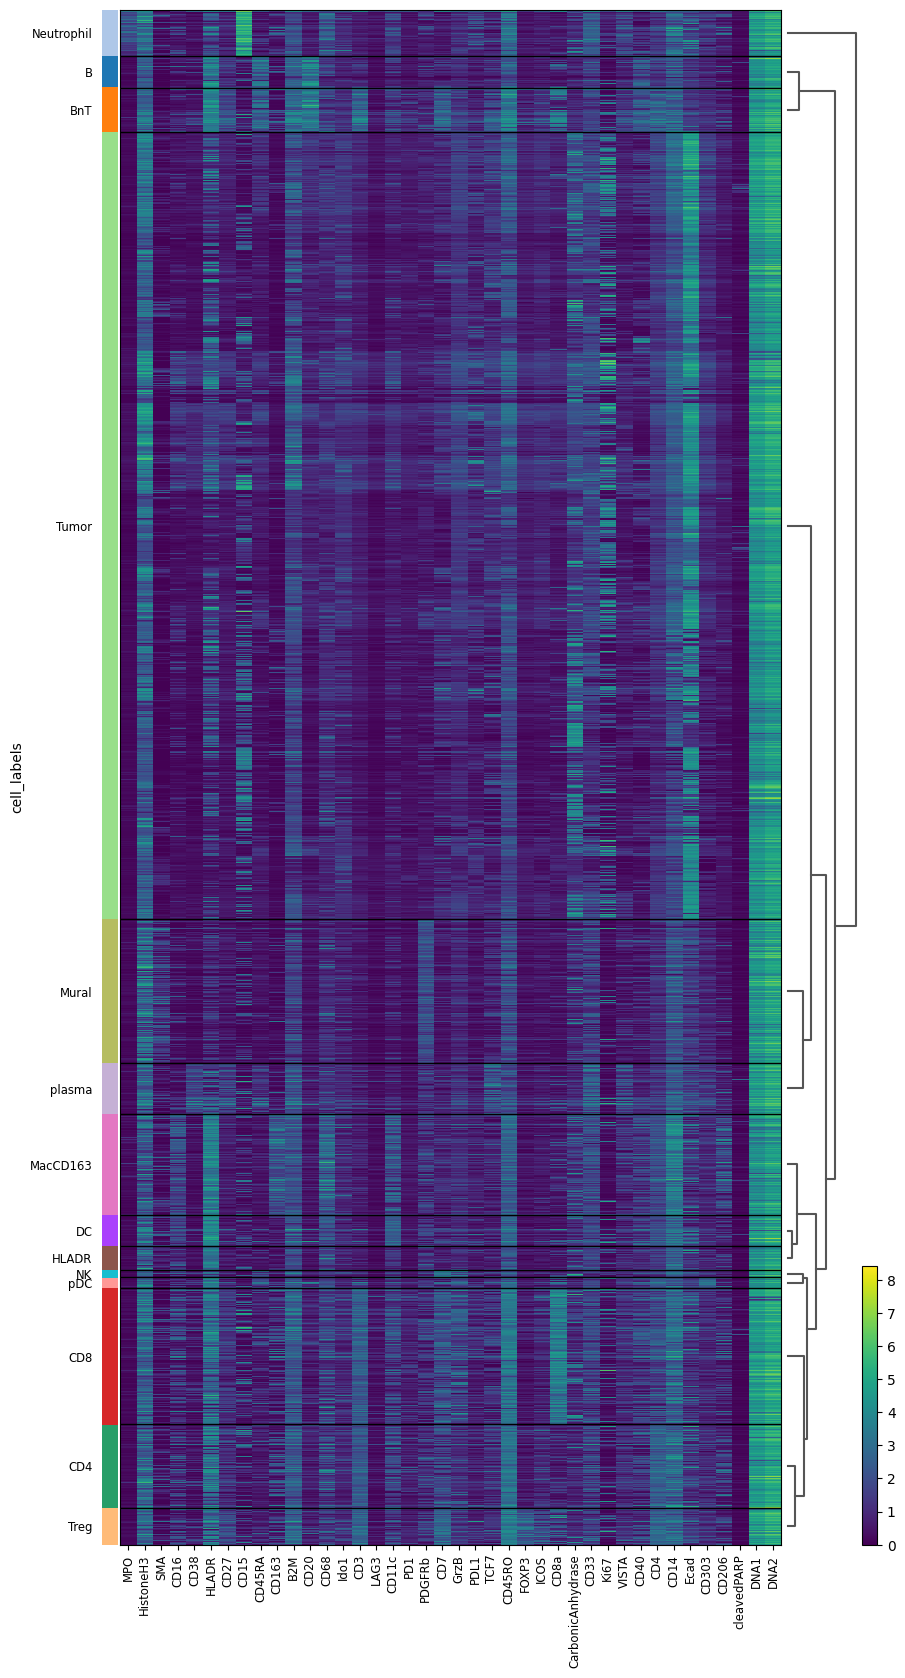

In [ ]:
# the line below I think makes sense accorind to the schema there: https://scanpy.readthedocs.io/en/stable/usage-principles.html
adata.var_names = marker_names
sc.pl.heatmap(adata, marker_names, groupby='cell_labels', dendrogram=True, figsize=(10,20))

### An attempt at computing correlation between marker expression and cell labels

!!! Not sure if the approach is correct - simple one-hot encoded cell labels concatenated to the df with expression values

In [41]:
df_exprs = pd.DataFrame(adata.layers['exprs'], columns = marker_names)
df_labels_encoded = pd.get_dummies(adata.obs.cell_labels, prefix="cell", dtype=float).reset_index(drop=True)
df_exprs = pd.concat([df_exprs, df_labels_encoded], axis=1)
df_exprs


,MPO,HistoneH3,SMA,CD16,CD38,HLADR,CD27,CD15,CD45RA,CD163,...,cell_DC,cell_HLADR,cell_MacCD163,cell_Mural,cell_NK,cell_Neutrophil,cell_Treg,cell_Tumor,cell_pDC,cell_plasma
0,0.000000,0.356404,0.100361,0.250455,0.102820,0.624800,0.080672,0.090959,0.105551,0.559954,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.027181,0.462005,0.225477,0.100934,0.120873,0.141697,0.083864,0.020021,0.148059,0.065923,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.033175,0.435122,0.275759,0.342161,0.091580,0.733683,0.000721,0.112340,0.244849,0.342814,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.033175,0.227001,0.112406,0.231138,0.102567,0.396472,0.129685,0.050009,0.238727,0.196804,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.027496,0.428921,0.177540,0.099366,0.082474,0.295517,0.019625,0.041701,0.183543,0.248609,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236786,0.044771,0.972477,0.522792,0.452190,0.169862,0.326357,0.326295,0.238182,0.261421,0.157233,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
236787,0.029884,0.718375,0.525726,0.140125,0.107772,0.086967,0.111346,0.029300,0.080419,0.063402,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
236788,0.022175,0.655988,0.062127,0.497294,0.451769,0.677491,0.284738,0.049750,0.091045,0.203722,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
236789,0.030184,0.765888,0.508173,0.160870,0.080647,0.242943,0.080070,0.053107,0.102526,0.033648,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
df_corr = df_exprs.corr()

<Axes: >

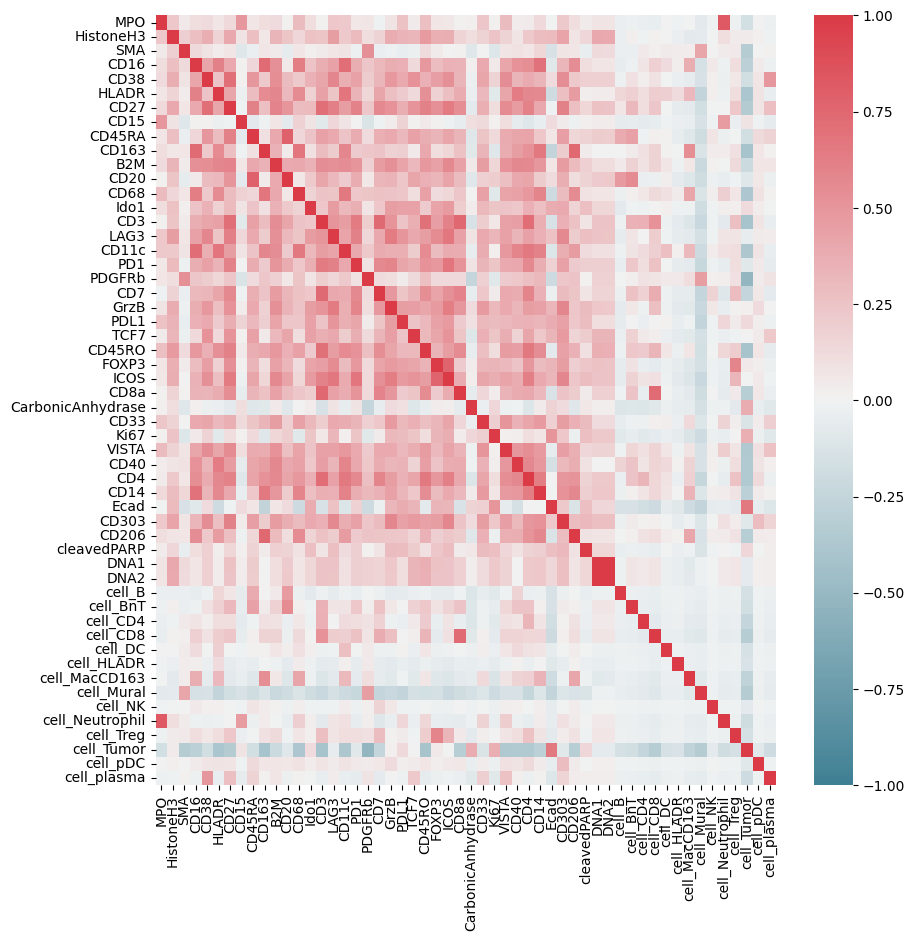

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_corr,
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            vmin=-1.0, vmax=1.0,
            xticklabels=df_corr.columns.values,
            yticklabels=df_corr.columns.values,
            ax=ax)

<Axes: >

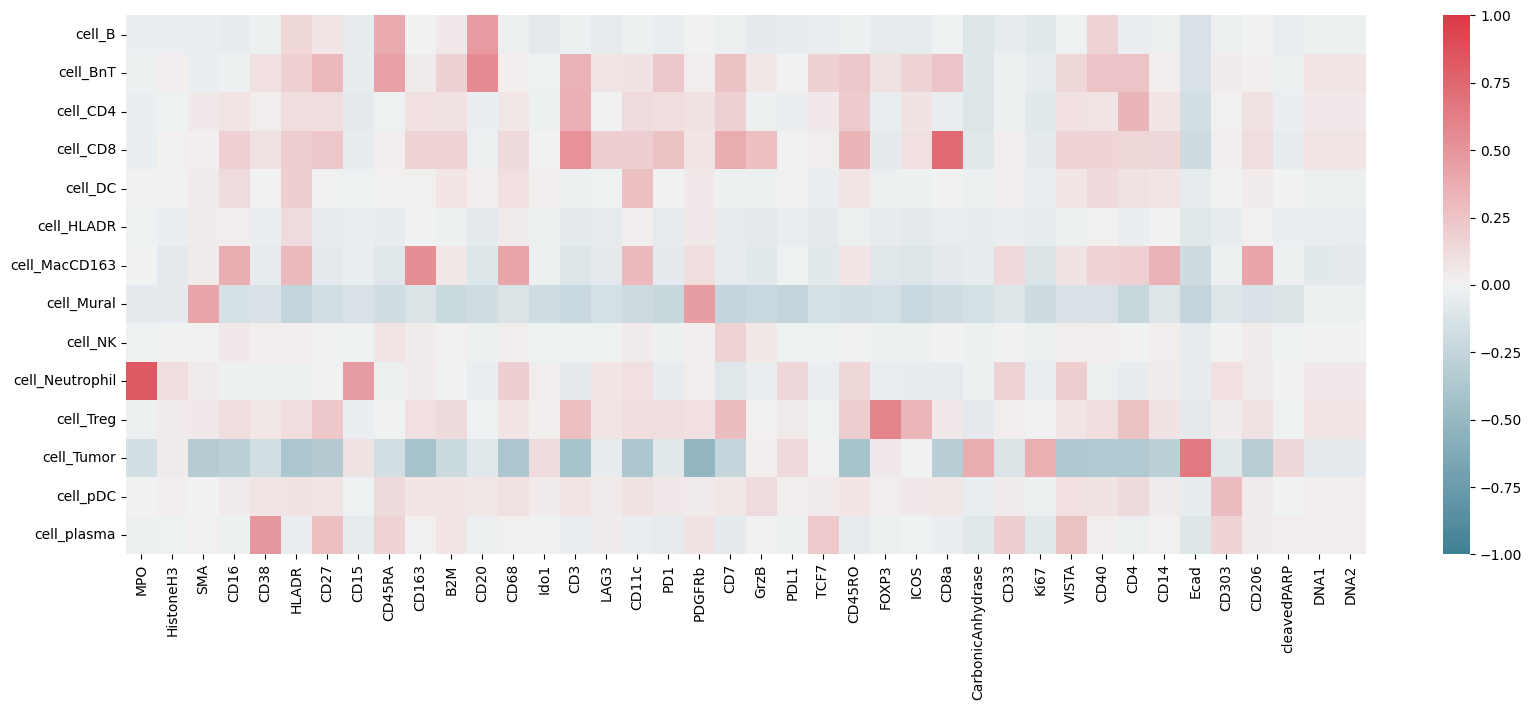

In [46]:
marker_cell_corr = df_corr.iloc[len(marker_names):][marker_names]

fig, ax = plt.subplots(figsize=(20,7))
sns.heatmap(marker_cell_corr,
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            vmin=-1.0, vmax=1.0,
            xticklabels=marker_cell_corr.columns.values,
            yticklabels=marker_cell_corr.index.values,
            ax=ax)

## Correlation patterns between markers and cell types (at least 3) - with a biological explanation

1. High expression of MPO in neutrophil cells.
2. High expression of Ecad in Tumor cells.
3. Higher FOXP3 in Treg
4. High CD8a in CD8
5. High CD15 in Neutrphils (and some Tumors, CD8, CD4)
6. High CD20 in B an BnT



## Three biologically driven patterns of intertype marker differentiation (e.g., Tumor PDL1+ vs Tumor PDL1-, Mac CD206+ vs Mac CD206-, etc.),


https://scbean.readthedocs.io/en/latest/tutorials/vipcca_mcl_tutorial.html#Plot-correlation